In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import default001 as dat_A1
import default002 as dat_A2
import seperate001 as dat_B1
import seperate002 as dat_B2

In [5]:
def import_data(dat):
    reg_delays = np.array(dat.reg_delays)
    gpu_delays = np.array(dat.gpu_delays)
    all_delays = np.array(dat.all_delays)
    reg_times = np.array(dat.reg_times)
    gpu_times = np.array(dat.gpu_times)
    all_times = np.array(dat.all_times)
    return  pd.DataFrame({'time':reg_times, 'delay':reg_delays}),\
            pd.DataFrame({'time':gpu_times, 'delay':gpu_delays}),\
            pd.DataFrame({'time':all_times, 'delay':all_delays})

In [6]:
def combine(list_of_lists):
    sup = []
    for list_ in list_of_lists: sup = sup + list(list_)
    return np.array(sup)

In [7]:
def get_hours(reg, gpu):
    max_hour = round(max(reg.time.max(), gpu.time.max())/60);
    return range(max_hour), max_hour;

In [8]:
def show_scatter(reg, gpu, name="simulation"):
    plt.scatter(reg.time, reg.delay, label='regular')
    plt.scatter(gpu.time, gpu.delay, label='gpu')
    plt.legend()
    plt.xlabel('time (min)')
    plt.ylabel('delay (min)')
    plt.title('Delay scatter plot for %s'%name)
    plt.show();

In [9]:
def show_arrival_rate(reg, gpu):
    hours, max_hour = get_hours(reg, gpu)
    per_hour = [sum([len(reg.time[(reg.time >= K*60) & (reg.time < (K+1)*60)]) for K in hours if K%24==k]) for k in range(24)]
    per_hour_gpu = [sum([len(gpu.time[(gpu.time >= K*60) & (gpu.time < (K+1)*60)]) for K in hours if K%24==k]) for k in range(24)]
    plt.scatter(range(24), per_hour, label='regular');
    plt.scatter(range(24), per_hour_gpu, label='gpu');
    plt.legend()
    plt.title('Arrival rate shown by arrival counts over %d minutes of simulation'%(max_hour*60))
    plt.ylabel('arrival count')
    plt.xlabel('hour of the day');
    plt.show();

In [10]:
def show_delay(reg, gpu):
    hours, max_hour = get_hours(reg, gpu)
    p = 4; # how many partitions in an hour
    part_hours = [h / p for h in range(24*p)]
    avg_reg_per_part = [combine([reg.delay[(reg.time >= K*60/p) & (reg.time < (K+1)*60/p)]\
                                 for K in hours if K%(24*p)==k]).mean() for k in range(24*p)]
    avg_gpu_per_part = [combine([gpu.delay[(gpu.time >= K*60/p) & (gpu.time < (K+1)*60/p)]\
                                 for K in hours if K%(24*p)==k]).mean() for k in range(24*p)]
    plt.scatter(part_hours, avg_reg_per_part, label='regular');
    plt.scatter(part_hours, avg_gpu_per_part, label='gpu');
    plt.legend()
    plt.title('Mean delay per %d minute interval over %d minutes of simulation'%(60/p, max_hour*60))
    plt.ylabel('mean delay (min)')
    plt.xlabel('hour of the day');
    plt.show();

In [11]:
def show_interarrival_times(reg, gpu):
    hours, max_hour = get_hours(reg, gpu)
    reg_time = np.array(reg.time)
    gpu_time = np.array(gpu.time)
    reg_iat = reg_time[1:] - reg_time[:-1]
    gpu_iat = gpu_time[1:] - gpu_time[:-1]
    p = 2; # how many partitions in an hour
    part_hours = [h / p for h in range(24*p)]
    
    avgt_reg_per_part = [combine([reg_iat[(reg_time[:-1] >= K*60/p) & (reg_time[:-1] < (K+1)*60/p)]\
                                  for K in hours if K%(24*p)==k]).mean() for k in range(24*p)]
    avgt_gpu_per_part = [combine([gpu_iat[(gpu_time[:-1] >= K*60/p) & (gpu_time[:-1] < (K+1)*60/p)]\
                                  for K in hours if K%(24*p)==k]).mean() for k in range(24*p)]
    plt.scatter(part_hours, avgt_reg_per_part, label='regular');
    #plt.scatter(part_hours, avgt_gpu_per_part, label='gpu');
    plt.legend()
    plt.title('Mean interarrival-time per %d minute interval over %d minutes of simulation'%(60/p, max_hour*60))
    plt.ylabel('mean interarrival-time (min)')
    plt.xlabel('hour of the day');
    plt.show();
    plt.scatter(part_hours, avgt_reg_per_part, label='regular');
    plt.scatter(part_hours, avgt_gpu_per_part, label='gpu');
    plt.legend()
    plt.title('Mean interarrival-time per %d minute interval over %d minutes of simulation'%(60/p, max_hour*60))
    plt.ylabel('mean interarrival-time (min)')
    plt.xlabel('hour of the day');
    plt.show();

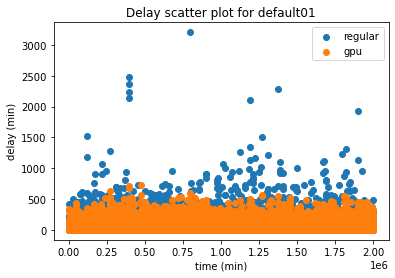

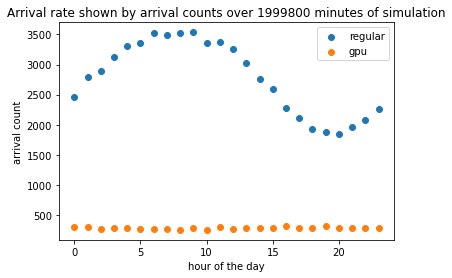

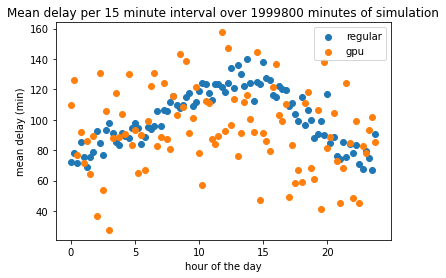

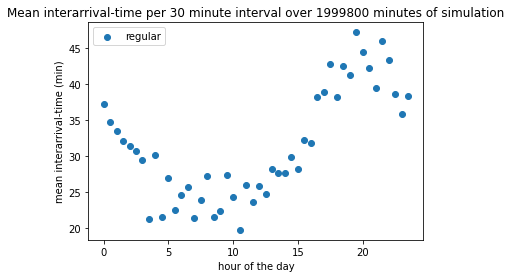

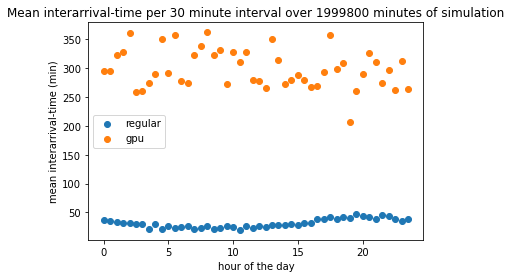

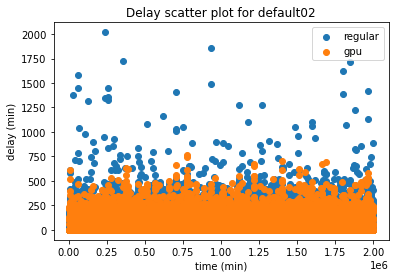

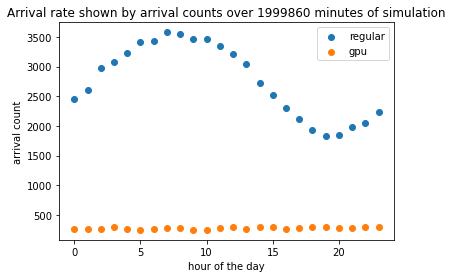

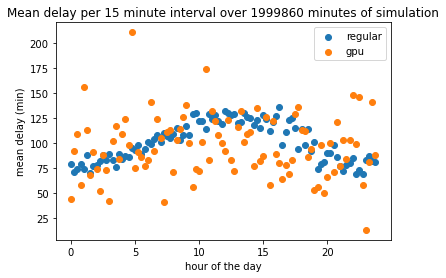

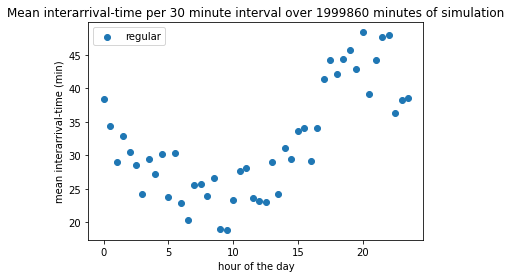

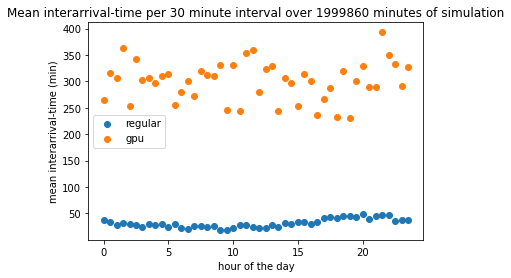

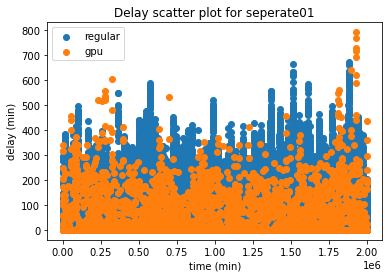

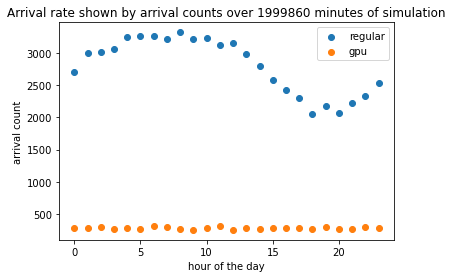

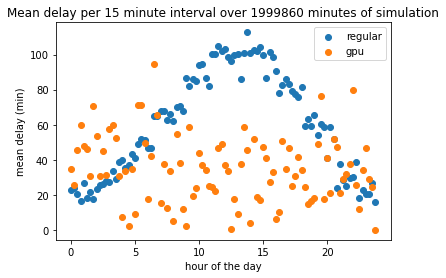

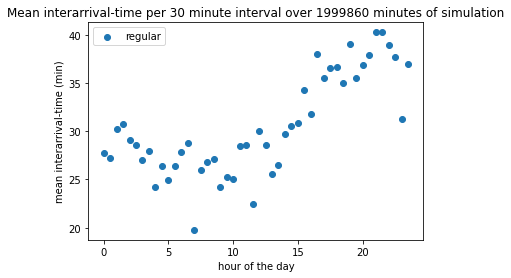

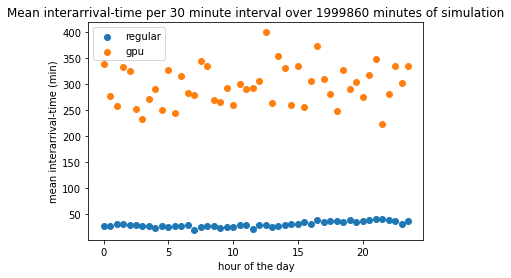

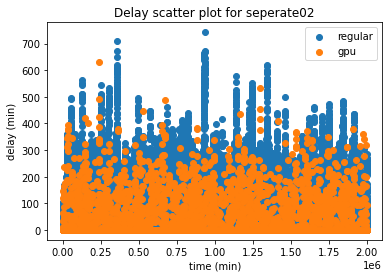

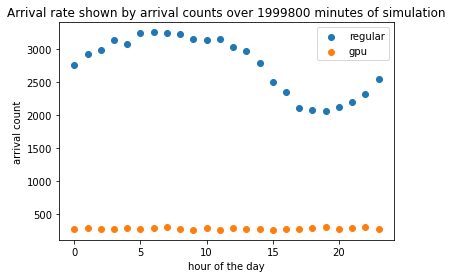

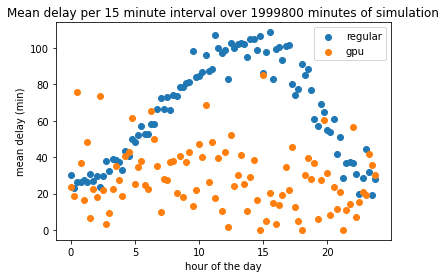

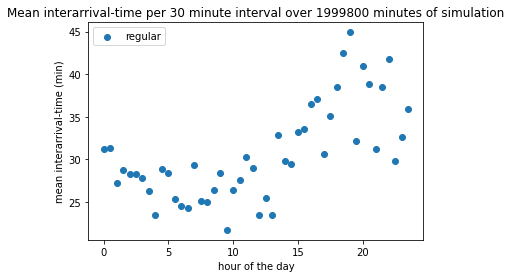

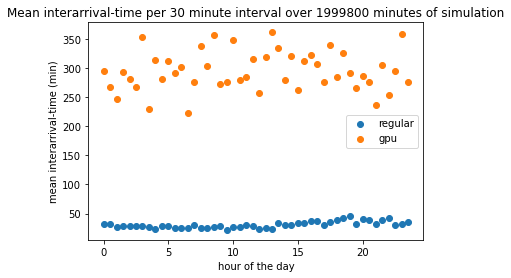

In [10]:
datasets = [dat_A1, dat_A2, dat_B1, dat_B2]
datanames = ["default01", "default02", "seperate01", "seperate02"]
for dat in datasets:
    reg, gpu, tot = import_data(dat)
    name = datanames[datasets.index(dat)]
    show_scatter(reg, gpu, name)
    show_arrival_rate(reg, gpu)
    show_delay(reg, gpu)
    show_interarrival_times(reg, gpu)

In [1]:
import default003 as dat_A3
import default004 as dat_A4
import seperate003 as dat_B3
import seperate004 as dat_B4

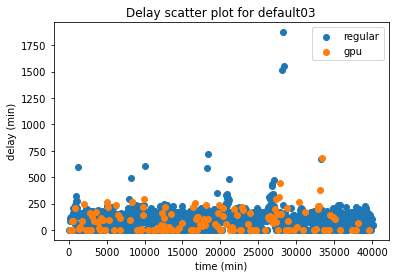

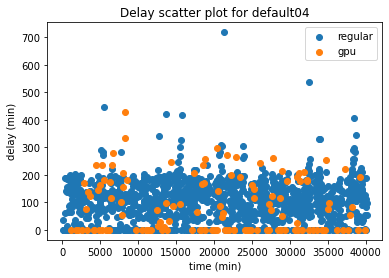

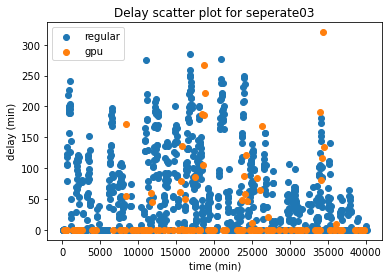

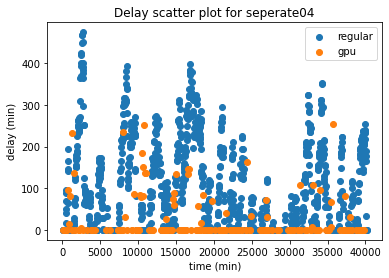

In [19]:
datasets = [dat_A3, dat_A4, dat_B3, dat_B4]
datanames = ["default03", "default04", "seperate03", "seperate04"]
for dat in datasets:
    reg, gpu, tot = import_data(dat)
    name = datanames[datasets.index(dat)]
    show_scatter(reg, gpu, name)
    #show_arrival_rate(reg, gpu)
    #show_delay(reg, gpu)
    #show_interarrival_times(reg, gpu)

# Final comparison

In [20]:
import default005 as DAT_0
import seperate005 as DAT_1
import smart001 as DAT_2

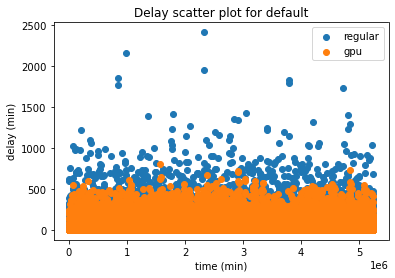

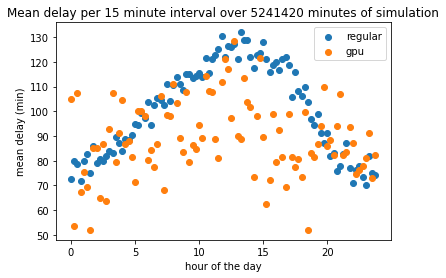

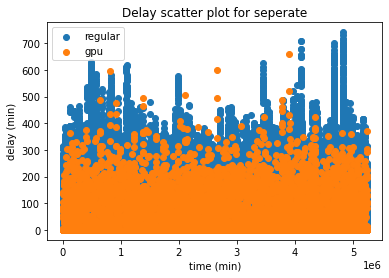

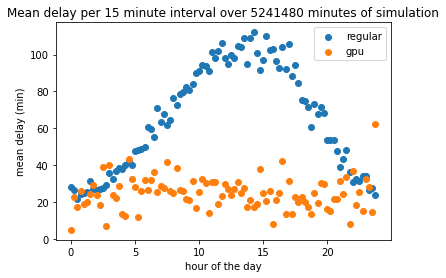

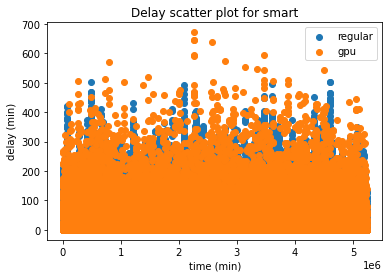

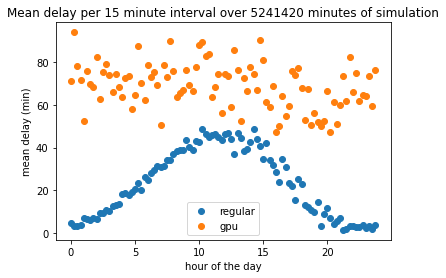

In [21]:
datasets = [DAT_0, DAT_1, DAT_2]
datanames = ["default", "seperate", "smart"]
for dat in datasets:
    reg, gpu, tot = import_data(dat)
    name = datanames[datasets.index(dat)]
    show_scatter(reg, gpu, name)
    #show_arrival_rate(reg, gpu)
    show_delay(reg, gpu)
    #show_interarrival_times(reg, gpu)

In [27]:
reg0, gpu0, _ = import_data(DAT_0)
reg1, gpu1, _ = import_data(DAT_1)
reg2, gpu2, _ = import_data(DAT_2)

In [31]:
print("routine0 reg 90%% = %.3f"%reg0['delay'].quantile(0.9))
print("routine0 gpu 90%% = %.3f"%gpu0['delay'].quantile(0.9))
print("routine1 reg 90%% = %.3f"%reg1['delay'].quantile(0.9))
print("routine1 gpu 90%% = %.3f"%gpu1['delay'].quantile(0.9))
print("routine2 reg 90%% = %.3f"%reg2['delay'].quantile(0.9))
print("routine2 gpu 90%% = %.3f"%gpu2['delay'].quantile(0.9))

routine0 reg 90% = 184.399
routine0 gpu 90% = 231.165
routine1 reg 90% = 179.548
routine1 gpu 90% = 110.974
routine2 reg 90% = 88.784
routine2 gpu 90% = 168.730


In [32]:
import smart002 as DAT_SIMI

In [33]:
reg3, gpu3, _ = import_data(DAT_SIMI)

In [34]:
print("routine3 reg 90%% = %.3f"%reg3['delay'].quantile(0.9))
print("routine3 gpu 90%% = %.3f"%gpu3['delay'].quantile(0.9))

routine3 reg 90% = 84.168
routine3 gpu 90% = 147.727


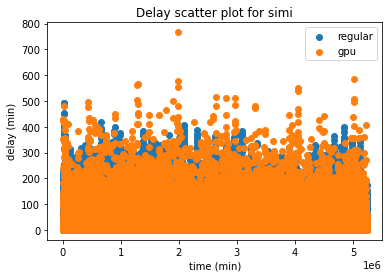

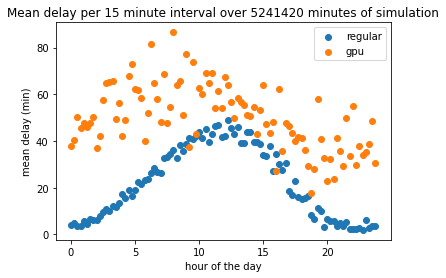

In [35]:
show_scatter(reg3, gpu3, "simi")
show_delay(reg3, gpu3)